In [9]:
pip install numpy pandas torch matplotlib seaborn emoji nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 13.2 MB/s eta 0:00:00


In [10]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
real_test = pd.read_csv("https://github.com/rrandev03/NLP_Final/raw/refs/heads/main/100_data/102_processed/real_testing_data.csv")
real_train = pd.read_csv('https://github.com/rrandev03/NLP_Final/raw/refs/heads/main/100_data/102_processed/real_training_data.csv')

In [12]:
pd.set_option("display.max_colwidth", None)

real_train.head()

,Unnamed: 0,Date,Tweet_Content,Manual_Training_Labels
0,0,2020-01-06,Rivian Electric Vehicles To Offer Alexa Capability https://t.co/FldqbOdxHC https://t.co/WKBczVrNVn,NEUTRAL
1,1,2020-01-07,RenewOregon: Electric vehicles face an uncertain policy landscape in 2020 #ElectricVehicle via @axios https://t.co/Xp9eUOoGH6 https://t.co/bsuJMC09tJ,NEUTRAL
2,2,2020-01-07,Really interesting chat about what’s going on with #transportation in San Francisco #micromobility https://t.co/zUQQU8nm2e,POSITIVE
3,3,2020-01-07,"As consumers, we're used to a lot of things that make our lives easier with ICE cars. We can fill up practically anywhere, we know how they work, how they shift, we understand them. For electric vehicles, none of that is the same. #CES2020\n\nhttps://t.co/BWChozt9GJ",NEGATIVE
4,4,2020-01-13,"With Model Y deliveries planned to begin this summer, our estimate is Tesla will deliver 506,000 electric vehicles in 2020 excl. SEMI. If Tesla grows sales at 20% a year after 2020 it could deliver 1.05 million vehicles in 2024.\nWhat year will Tesla reach 1 million deliveries?",NEUTRAL


In [13]:
real_test.head()

,Unnamed: 0,Date,Tweet_Content,Manual_Testing_Labels
0,0,2020-02-07,"Find out why electric vehicles are a smart transportation choice and plug in to even more reasons to make the switch by visiting the Home, Garden &amp; Remodeling Show from Feb. 28 to March 1 and stop by the LG&amp;E and KU booth. Learn more at https://t.co/cc7JEBsLuU. #hgrs2020 https://t.co/PeFeRP9EOs",POSITIVE
1,1,2020-02-08,How Soon Will Electric Vehicles Kill The Gasoline Car? https://t.co/Nivn9TmVqA https://t.co/58DlNr2gyz,NEUTRAL
2,2,2020-02-18,"AI delivers a battery boost to electric vehicles, slashing testing times #98% #TechRepublic https://t.co/pV2gMmSRqm @TechRepublic https://t.co/DhuMNrxRuh",NEUTRAL
3,3,2020-03-04,"There is so much anti-electric vehicles propaganda around, kids have started repeating it recently: “Oh, EVs aren’t clean because of how batteries are made and how they're discarded""\n\nEp. 31 of #TheAngryCleanEnergyGuy podcast sets out what to do about it\n\nhttps://t.co/G5jXbcCqdF https://t.co/5Nv4ZbiEfl",POSITIVE
4,4,2020-03-17,"With the purchase of fully electric vehicles and the development of a tailor made Electric Government Vehicles(EGV) course, PROCentrum Driving is proudly the first professional European trainer in this new field.",NEUTRAL


In [14]:
train_df = real_train[['Tweet_Content', 'Manual_Training_Labels']]
test_df = real_test[['Tweet_Content', 'Manual_Testing_Labels']]

Data Pre Processing

In [15]:
import re, string
import emoji
import nltk

In [16]:
# Clean emojis from text
def strip_emoji(text):
    return emoji.replace_emoji(text, replace='')  # Remove emoji by replacing them with an empty string

#Remove punctuations, links, mentions and \r\n new line characters
def strip_all_entities(text):
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) #remove hashtags symbol from words in the middle of the sentence
    return new_tweet2

#Filter special characters such as & and $ present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text): # remove multiple spaces
    return re.sub("\s\s+" , " ", text)

In [17]:
texts_new = []
for t in train_df.Tweet_Content:
    texts_new.append(remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(t))))))

train_df['Cleaned_Tweets'] = texts_new
train_df.head()

<ipython-input-17-95793eb7b57c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Cleaned_Tweets'] = texts_new


,Tweet_Content,Manual_Training_Labels,Cleaned_Tweets
0,Rivian Electric Vehicles To Offer Alexa Capability https://t.co/FldqbOdxHC https://t.co/WKBczVrNVn,NEUTRAL,rivian electric vehicles to offer alexa capability
1,RenewOregon: Electric vehicles face an uncertain policy landscape in 2020 #ElectricVehicle via @axios https://t.co/Xp9eUOoGH6 https://t.co/bsuJMC09tJ,NEUTRAL,reneworegon electric vehicles face an uncertain policy landscape in 2020 electricvehicle via
2,Really interesting chat about what’s going on with #transportation in San Francisco #micromobility https://t.co/zUQQU8nm2e,POSITIVE,really interesting chat about whats going on with transportation in san francisco micromobility
3,"As consumers, we're used to a lot of things that make our lives easier with ICE cars. We can fill up practically anywhere, we know how they work, how they shift, we understand them. For electric vehicles, none of that is the same. #CES2020\n\nhttps://t.co/BWChozt9GJ",NEGATIVE,as consumers were used to a lot of things that make our lives easier with ice cars we can fill up practically anywhere we know how they work how they shift we understand them for electric vehicles none of that is the same ces2020
4,"With Model Y deliveries planned to begin this summer, our estimate is Tesla will deliver 506,000 electric vehicles in 2020 excl. SEMI. If Tesla grows sales at 20% a year after 2020 it could deliver 1.05 million vehicles in 2024.\nWhat year will Tesla reach 1 million deliveries?",NEUTRAL,with model y deliveries planned to begin this summer our estimate is tesla will deliver 506000 electric vehicles in 2020 excl semi if tesla grows sales at 20 a year after 2020 it could deliver 105 million vehicles in 2024 what year will tesla reach 1 million deliveries


In [18]:
texts_new = []
for t in test_df.Tweet_Content:
    texts_new.append(remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(t))))))

test_df['Cleaned_Tweets'] = texts_new
test_df.head()

<ipython-input-18-873a2fd04426>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Cleaned_Tweets'] = texts_new


,Tweet_Content,Manual_Testing_Labels,Cleaned_Tweets
0,"Find out why electric vehicles are a smart transportation choice and plug in to even more reasons to make the switch by visiting the Home, Garden &amp; Remodeling Show from Feb. 28 to March 1 and stop by the LG&amp;E and KU booth. Learn more at https://t.co/cc7JEBsLuU. #hgrs2020 https://t.co/PeFeRP9EOs",POSITIVE,find out why electric vehicles are a smart transportation choice and plug in to even more reasons to make the switch by visiting the home garden amp remodeling show from feb 28 to march 1 and stop by the lgampe and ku booth learn more at hgrs2020
1,How Soon Will Electric Vehicles Kill The Gasoline Car? https://t.co/Nivn9TmVqA https://t.co/58DlNr2gyz,NEUTRAL,how soon will electric vehicles kill the gasolinecar
2,"AI delivers a battery boost to electric vehicles, slashing testing times #98% #TechRepublic https://t.co/pV2gMmSRqm @TechRepublic https://t.co/DhuMNrxRuh",NEUTRAL,ai delivers a battery boost to electric vehicles slashing testing times 98 techrepublic
3,"There is so much anti-electric vehicles propaganda around, kids have started repeating it recently: “Oh, EVs aren’t clean because of how batteries are made and how they're discarded""\n\nEp. 31 of #TheAngryCleanEnergyGuy podcast sets out what to do about it\n\nhttps://t.co/G5jXbcCqdF https://t.co/5Nv4ZbiEfl",POSITIVE,there is so much antielectric vehicles propaganda around kids have started repeating it recently oh evs arent clean because of how batteries are made and how theyre discarded ep 31 of theangrycleanenergyguy podcast sets out what to do about it
4,"With the purchase of fully electric vehicles and the development of a tailor made Electric Government Vehicles(EGV) course, PROCentrum Driving is proudly the first professional European trainer in this new field.",NEUTRAL,with the purchase of fully electric vehicles and the development of a tailor made electric government vehiclesegv course procentrum driving is proudly the first professional european trainer in this new field


Importing Transformers

In [19]:
#transformers
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel

In [20]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

token_lens = []

for txt in train_df['Cleaned_Tweets'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))

max_len=np.max(token_lens)
print(f"MAX TOKENIZED SENTENCE LENGTH FOR TRAINING DATA: {max_len}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

MAX TOKENIZED SENTENCE LENGTH FOR TRAINING DATA: 64


In [21]:
train_df = train_df.sample(frac=1).reset_index(drop=True)

In [22]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

token_lens = []

for txt in test_df['Cleaned_Tweets'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))

max_len=np.max(token_lens)
print(f"MAX TOKENIZED SENTENCE LENGTH FOR TESTING DATA: {max_len}")

MAX TOKENIZED SENTENCE LENGTH FOR TESTING DATA: 66


In [23]:
test_df = test_df.sample(frac=1).reset_index(drop=True)

Tweet Label Column Analysis

In [24]:
train_df['Manual_Training_Labels'].value_counts()


,count
Manual_Training_Labels,
NEUTRAL,101
POSITIVE,52
NEGATIVE,29
POSITIVE,10
NEGATIVE,7
NEGTIVE,1


In [25]:
train_df.loc[train_df['Manual_Training_Labels'] == 'NEGTIVE', 'Manual_Training_Labels'] = 'NEGATIVE'
train_df['Manual_Training_Labels'] = train_df['Manual_Training_Labels'].str.strip()


In [26]:
train_df['Manual_Training_Labels'].value_counts()


,count
Manual_Training_Labels,
NEUTRAL,101
POSITIVE,62
NEGATIVE,37


In [27]:
train_df['Sentiment'] = train_df['Manual_Training_Labels'].map({'NEGATIVE':0,'NEUTRAL':1,'POSITIVE':2})
train_df

,Tweet_Content,Manual_Training_Labels,Cleaned_Tweets,Sentiment
0,Electric Vehicles\n\nWhat could be under the 300M and 700M vehicle categories?\n\nConfigurable van + affordable EV? https://t.co/iD27gyXg6H,NEUTRAL,electric vehicles what could be under the 300m and 700m vehicle categories configurable van affordable ev,1
1,"Get The Facts on Electric Vehicles. Tonight on #WGAL News 8 at six, we begin a week-long series - Charged. What electric vehicles will mean for our roads, taxes, safety and lifestyle. 8 On Your Side has the answers. https://t.co/6RE8MRqWkK",NEUTRAL,get the facts on electric vehicles tonight on wgal news 8 at six we begin a weeklong series charged what electric vehicles will mean for our roads taxes safety and lifestyle 8 on your side has the answers,1
2,Governments will play a huge part in moving drivers towards #EVs. Many have already set firm dates for banning new sales of ICE vehicles. And #COP26 will put even more pressure on policy makers to accelerate the phase-out 👇 \nhttps://t.co/0uzyMIR8q8 https://t.co/ZJv46CxRMF,NEUTRAL,governments will play a huge part in moving drivers towards evs many have already set firm dates for banning new sales of ice vehicles and cop26 will put even more pressure on policy makers to accelerate the phaseout,1
3,This is unreal. Biden and the White House shunned Tesla on its 'EV Day' at the behest of UAW. \n\nNow UAW is trying to block the USA's transition to EVs. \n\nUAW President cited concerns over what they EVs would look like and impact their membership\n\n$tsla \n\nhttps://t.co/CNWxrtYrQf,NEUTRAL,this is unreal biden and the white house shunned tesla on its ev day at the behest of uaw now uaw is trying to block the usas transition to evs uaw president cited concerns over what they evs would look like and impact their membership tsla,1
4,Beside Jamie-Lynn Spears crazy cat killing ass electric cars are too quiet. Blind people don't hear when they cross the street. \nEurope requires electric vehicles to make some sound now. \nhttps://t.co/O7z79CsfDe,NEGATIVE,beside jamielynn spears crazy cat killing ass electric cars are too quiet blind people dont hear when they cross the street europe requires electric vehicles to make some sound now,0
...,...,...,...,...
195,Does the world have enough lithium to move to electric vehicles?\nhttps://t.co/gCay8Sb1v3 https://t.co/5UJ244gPpR,NEUTRAL,does the world have enough lithium to move to electric vehicles,1
196,"Tip: Stop buying electric vehicles and they stop building them, along with the charging stations to replace fuel and eventually flip the country to ""electric everything"" so they can cut you off with a flip of a switch.",NEGATIVE,tip stop buying electric vehicles and they stop building them along with the charging stations to replace fuel and eventually flip the country to electric everything so they can cut you off with a flip of a switch,0
197,Tesla CEO Elon Musk has given employees of his electric vehicle company a choice: return to in-person work for 40 hours per week or resign.\n\nhttps://t.co/BmFMXejfJO,NEGATIVE,tesla ceo elon musk has given employees of his electric vehicle company a choice return to inperson work for 40 hours per week or resign,0
198,"Unfortunately, the fantasy of widespread, uniform electric vehicle use is at odds with the reality of these machines. \nAfter mass rain and floods, several electric vehicles across the Sunshine State are literally exploding.\nhttps://t.co/SAGmHr0OGU",NEGATIVE,unfortunately the fantasy of widespread uniform electric vehicle use is at odds with the reality of these machines after mass rain and floods several electric vehicles across the sunshine state are literally exploding,0


In [28]:
test_df['Manual_Testing_Labels'].value_counts()


,count
Manual_Testing_Labels,
NEUTRAL,52
POSITIVE,27
NEGATIVE,16
NEGATIVE,4
POSITIVE,3
NEUTRAL,1


In [29]:
test_df['Manual_Testing_Labels'] = test_df['Manual_Testing_Labels'].str.strip()


In [30]:
test_df['Manual_Testing_Labels'].value_counts()


,count
Manual_Testing_Labels,
NEUTRAL,53
POSITIVE,30
NEGATIVE,20


In [31]:
test_df['Sentiment'] = test_df['Manual_Testing_Labels'].map({'NEGATIVE':0,'NEUTRAL':1,'POSITIVE':2})
test_df

,Tweet_Content,Manual_Testing_Labels,Cleaned_Tweets,Sentiment
0,"Tesla's secret new 'million mile' battery: #Tesla plans to introduce a new low-cost, long-life battery in its #Model3 in China within a year that will bring the cost of electric vehicles in line with gas cars &amp; allow EV batteries to have 2nd life in the electric power grid #EV https://t.co/CzLQUzi0Ag",NEUTRAL,teslas secret new million mile battery tesla plans to introduce a new lowcost longlife battery in its model3 in china within a year that will bring the cost of electric vehicles in line with gas cars amp allow ev batteries to have 2nd life in the electric power grid ev,1
1,"YELLEN SAYS CLIMATE CHANGE POSES EXISTENTIAL THREAT, REQUIRES INVESTMENT IN CLEAN TECHNOLOGY, RENEWABLE ENERGY, ELECTRIC VEHICLES",NEGATIVE,yellen says climate change poses existential threat requires investment in clean technology renewable energy electric vehicles,0
2,"Rivian has now produced just over 1,000 electric vehicles https://t.co/AIr5AJ6WMh https://t.co/mzahC63VyP",NEUTRAL,rivian has now produced just over 1000 electric vehicles,1
3,"Tesla delivers 88,400 electric vehicles, beating expectations https://t.co/85MVf85CZH https://t.co/p52LM1IOJW",NEUTRAL,tesla delivers 88400 electric vehicles beating expectations,1
4,"There is so much anti-electric vehicles propaganda around, kids have started repeating it recently: “Oh, EVs aren’t clean because of how batteries are made and how they're discarded""\n\nEp. 31 of #TheAngryCleanEnergyGuy podcast sets out what to do about it\n\nhttps://t.co/G5jXbcCqdF https://t.co/5Nv4ZbiEfl",POSITIVE,there is so much antielectric vehicles propaganda around kids have started repeating it recently oh evs arent clean because of how batteries are made and how theyre discarded ep 31 of theangrycleanenergyguy podcast sets out what to do about it,2
...,...,...,...,...
98,Clean mobility will be the future of transportation. Electric Vehicles are currently the most viable option of clean mobility and they are fueled by electricity which eliminates emissions. \nhttps://t.co/8ZkuSxLimw https://t.co/Lhf7SHTCXd,POSITIVE,clean mobility will be the future of transportation electric vehicles are currently the most viable option of clean mobility and they are fueled by electricity which eliminates emissions,2
99,Electric vehicle gets towed to charging station because it ran out of juice during live @FoxNews broadcast.\n\nSegment was discussing how Democrats are trying to convince you rubes to buy electric vehicles. https://t.co/0h3NXF40sB,NEGATIVE,electric vehicle gets towed to charging station because it ran out of juice during live broadcast segment was discussing how democrats are trying to convince you rubes to buy electric vehicles,0
100,I honestly think every Californian needs to buy a human sized hamster wheel in order to charge all their forthcoming electric vehicles. Only way I can see this going well.,NEGATIVE,i honestly think every californian needs to buy a human sized hamster wheel in order to charge all their forthcoming electric vehicles only way i can see this going well,0
101,"Thank you, @POTUS for getting US supercharging EV industry as this is future!! It doesn’t matter how much @GOP fights for Big Oil, our Climate depends on everyone going to Electric Vehicles!!",POSITIVE,thank you for getting us supercharging ev industry as this is future it doesnt matter how much fights for big oil our climate depends on everyone going to electric vehicles,2


Class Balancing by RandomOverSampler


In [32]:
len(train_df)

200

In [33]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
train_x, train_y = ros.fit_resample(np.array(train_df['Cleaned_Tweets']).reshape(-1, 1), np.array(train_df['Sentiment']).reshape(-1, 1));
train_os = pd.DataFrame(list(zip([x[0] for x in train_x], train_y)), columns = ['Cleaned_Tweets', 'Sentiment']);

In [34]:
train_os['Sentiment'].value_counts()

,count
Sentiment,
1,101
0,101
2,101


Train-Validation-Test

In [35]:
#from sklearn.model_selection import train_test_split

#X_train, X_valid, y_train, y_valid = train_test_split(train_os['Cleaned_Tweets'], train_os['Sentiment'], test_size=0.2, random_state=42)

In [ ]:
X_train = train_os(['Cleaned_Tweets'])
y_train = train_os(['Sentiment'])

In [36]:
X_test = test_df['Cleaned_Tweets']
y_test = test_df['Sentiment']

One Hot Encoding

In [37]:
y_train_spare = y_train.copy()
#y_valid_spaer = y_valid.copy()
y_test_spare = y_test.copy()

In [38]:
from sklearn import preprocessing

ohe = preprocessing.OneHotEncoder()
y_train = ohe.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
#y_valid = ohe.fit_transform(np.array(y_valid).reshape(-1, 1)).toarray()
y_test = ohe.fit_transform(np.array(y_test).reshape(-1, 1)).toarray()

BERT Sentiment Analysis

In [39]:
X_train = X_train.reset_index(drop=True)
# y_train = y_train.reset_index(drop=True)
#X_valid = X_valid.reset_index(drop=True)
# y_valid = y_valid.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
# y_test = y_test.reset_index(drop=True)

In [40]:
MAX_LEN=128

def tokenize(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=MAX_LEN,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

In [41]:
train_input_ids, train_attention_masks = tokenize(X_train, MAX_LEN)
#val_input_ids, val_attention_masks = tokenize(X_valid, MAX_LEN)
test_input_ids, test_attention_masks = tokenize(X_test, MAX_LEN)

In [42]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [43]:
import tensorflow as tf

In [44]:
def create_model(bert_model, max_len=MAX_LEN):

    ##params###
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-6,
    decay_steps=10000,
    decay_rate=0.9)
    opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
    loss = tf.keras.losses.CategoricalCrossentropy()
    #accuracy = tf.keras.metrics.CategoricalAccuracy() change this to f1 score
#make training 240 and 60 for testing
#get rid of validation set
#stratified cross validation



    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')

    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')

    embeddings = bert_model([input_ids,attention_masks])[1]

    output = tf.keras.layers.Dense(3, activation="softmax")(embeddings)

    model = tf.keras.models.Model(inputs = [input_ids,attention_masks], outputs = output)

    model.compile(opt, loss=loss, metrics=accuracy)
    return model


In [45]:
model = create_model(bert_model, MAX_LEN)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_1[0][0]',             
 )                           ngAndCrossAttentions(last_   40         'input_2[0][0]']             
                             hidden_state=(None, 128, 7                                           
                             68),                                                             

In [46]:
len(X_train)

242

In [47]:
len(X_test)

103

In [48]:
bert_history = model.fit([train_input_ids, train_attention_masks], y_train, epochs=20, batch_size=5)

Epoch 1/20
49/49 [==============================] - 50s 260ms/step - loss: 1.1204 - categorical_accuracy: 0.3223 - val_loss: 1.0479 - val_categorical_accuracy: 0.4262
Epoch 2/20
49/49 [==============================] - 9s 183ms/step - loss: 1.0717 - categorical_accuracy: 0.4380 - val_loss: 1.0261 - val_categorical_accuracy: 0.5410
Epoch 3/20
49/49 [==============================] - 9s 182ms/step - loss: 1.0314 - categorical_accuracy: 0.5537 - val_loss: 0.9963 - val_categorical_accuracy: 0.6066
Epoch 4/20
49/49 [==============================] - 9s 188ms/step - loss: 0.9747 - categorical_accuracy: 0.5992 - val_loss: 0.9572 - val_categorical_accuracy: 0.6721
Epoch 5/20
49/49 [==============================] - 9s 186ms/step - loss: 0.9357 - categorical_accuracy: 0.6364 - val_loss: 0.9047 - val_categorical_accuracy: 0.7049
Epoch 6/20
49/49 [==============================] - 9s 182ms/step - loss: 0.8560 - categorical_accuracy: 0.7025 - val_loss: 0.8510 - val_categorical_accuracy: 0.6721
Epo

Test data

In [49]:
results = model.predict([test_input_ids, test_attention_masks])

4/4 [==============================] - 3s 208ms/step


In [50]:
results

array([[0.01289818, 0.90631443, 0.0807874 ],
       [0.08256078, 0.8172666 , 0.10017265],
       [0.06495153, 0.8390331 , 0.09601531],
       [0.04005917, 0.9156727 , 0.04426804],
       [0.30329126, 0.3214936 , 0.37521517],
       [0.02050518, 0.44615862, 0.53333616],
       [0.0250553 , 0.7563088 , 0.21863595],
       [0.5067083 , 0.3288613 , 0.16443042],
       [0.13464561, 0.27433196, 0.59102243],
       [0.07118514, 0.5286745 , 0.40014035],
       [0.6880349 , 0.12692252, 0.1850426 ],
       [0.5217325 , 0.22723511, 0.25103244],
       [0.35214218, 0.4256472 , 0.22221057],
       [0.03035529, 0.7803111 , 0.18933356],
       [0.03642714, 0.8435765 , 0.11999638],
       [0.03024657, 0.17991099, 0.78984237],
       [0.10104433, 0.36472875, 0.53422695],
       [0.03425038, 0.7322663 , 0.2334833 ],
       [0.0665143 , 0.46028087, 0.47320482],
       [0.25003275, 0.4127116 , 0.3372557 ],
       [0.15401274, 0.48115036, 0.3648369 ],
       [0.02585098, 0.61839867, 0.35575035],
       [0.

In [51]:
y_pred = np.zeros_like(results)
y_pred[np.arange(len(y_pred)), results.argmax(1)] = 1
y_pred

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0

In [52]:
y_test

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1

              precision    recall  f1-score   support

           0       0.53      0.40      0.46        20
           1       0.70      0.66      0.68        53
           2       0.55      0.70      0.62        30

    accuracy                           0.62       103
   macro avg       0.60      0.59      0.58       103
weighted avg       0.62      0.62      0.62       103



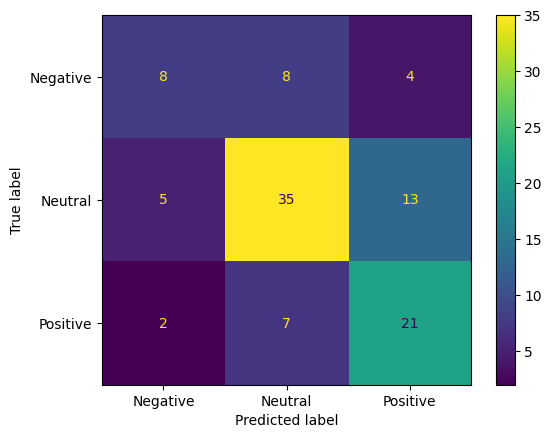

In [54]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

print(classification_report(y_test.argmax(1), y_pred.argmax(1)))
cm  = confusion_matrix(y_test.argmax(1), y_pred.argmax(1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Neutral', 'Positive'])
disp.plot()
plt.show()
